![x-ray](images/person100_bacteria_475.jpeg)

# Detecting Pneumonia with Deep Learning

**Authors:** Ian Butler, Red the dog

***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

In undeveloped areas of the world, pneumonia is one of the top five leading causes of death in children under the age of five. This project seeks to use deep learning neural networks to predict whether or not children have pneumonia so that proper treatment can be administered more quickly and more effectively. The data we used comes from the Guangzhou Women and Children’s Medical Center in Guangzhou, China and is a collection of chest x-rays of children between the ages of 1 and 5. We used densely connected neural networks and convolutional neural networks to achieve a classification accuracy of 95% on unseen data. Based on the performance of this neural network, we recommend undeveloped communities adopt this model in for use with the chest x-rays they already have access to, in order to expedite the diagnostic process and save lives.

***

## Objectives

A summary of the problems we are trying to solve and the data questions that we plan to answer to solve them.

***

Questions to consider:
* What are the organization's pain points related to this project?
    * Pneumonia is among the top five causes of death in children under the age of five in undeveloped areas of the world.
    * Testing for pneumonia in these areas is difficult, on account of the lack of qualified medical personnel and equipment.
    * More children could be treated if their sickness was properly identified more quickly and with less expense.

***

## Data Understanding

A description of the data being used for this project.

***

Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
    * The data comes to us from Kaggle.
    * The data comes originally from the Guangzhou Women and Children’s Medical Center in Guangzhou, China.
    * The data relates to the project in that it is a collection of chest x-rays of normal and pneumonic lungs.
* What do the data represent? Who is in the sample?
    * Each entry in the data is one chest x-ray, having normal lung condition, viral pneumonia, or bacterial pneumonia.
    * The sample consists of 5,856 of pediatric patients one to five years old.
* What is the target class?
    * The target class is whether a patient has normal lungs or pneumonic lungs.
    * There is no distinction in this project between identifying viral or bacterial pneumonia.

For further reading on the data in the environment from which it was accessed, please consult the following URL:
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

A brief description of the data from the above site is as follows:

"The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert."

***

## Data Preparation

***

Let us begin by importing all of the packages we will be using in this project.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scipy
import keras
from PIL import Image
from scipy import ndimage
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

%matplotlib inline

np.random.seed(42)

Now that we have our packages, let us create some variables for use in bringing in our data.

In [2]:
test_folder = './data/chest_xray/test/'
val_folder = './data/chest_xray/val/'
train_folder = './data/chest_xray/train/'

Now that we have our file paths established as variables, let us set up our data architecture with those directories.<br>We will do this for three sizes of reduced images: 64x64, 128x128, and 256x256.<br>Note that the batch size is an additive integer indicative of the number of images in the normal and pneumonic folders, respectively.

In [3]:
# get all the data in the directory ./data/chest_xray/test/ (234+390 images), and reshape them to 64x64
test_generator64 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 234+390) 

# get all the data in the directory ./data/chest_xray/val/ (8+8 images), and reshape them to 64x64
val_generator64 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 8+8)

# get all the data in the directory ./data/chest_xray/train/ (1341+3875 images), and reshape them to 64x64
train_generator64 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=1341+3875)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
# get all the data in the directory ./data/chest_xray/test/ (234+390 images), and reshape them to 128x128
test_generator128 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(128, 128), batch_size = 234+390) 

# get all the data in the directory ./data/chest_xray/val/ (8+8 images), and reshape them to 128x128
val_generator128 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(128, 128), batch_size = 8+8)

# get all the data in the directory ./data/chest_xray/train/ (1341+3875 images), and reshape them to 128x128
train_generator128 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(128, 128), batch_size=1341+3875)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [5]:
# get all the data in the directory ./data/chest_xray/test/ (234+390 images), and reshape them to 256x256
test_generator256 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(256, 256), batch_size = 234+390) 

# get all the data in the directory ./data/chest_xray/val/ (8+8 images), and reshape them to 256x256
val_generator256 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(256, 256), batch_size = 8+8)

# get all the data in the directory ./data/chest_xray/train/ (1341+3875 images), and reshape them to 256x256
train_generator256 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(256, 256), batch_size=1341+3875)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


Now that we have our data architecture established, let us actually create the image arrays and label arrays for our data.

In [6]:
# create the data sets for 64x64
train_images64, train_labels64 = next(train_generator64)
test_images64, test_labels64 = next(test_generator64)
val_images64, val_labels64 = next(val_generator64)

In [7]:
# create the data sets for 128x128
train_images128, train_labels128 = next(train_generator128)
test_images128, test_labels128 = next(test_generator128)
val_images128, val_labels128 = next(val_generator128)

In [8]:
# create the data sets for 256x256
train_images256, train_labels256 = next(train_generator256)
test_images256, test_labels256 = next(test_generator256)
val_images256, val_labels256 = next(val_generator256)

Now that we have created the arrays, let us perform some simple data exploration with them to understand what we have.

In [9]:
# Explore the 64x64 dataset
m_train64 = train_images64.shape[0]
num_px64 = train_images64.shape[1]
m_test64 = test_images64.shape[0]
m_val64 = val_images64.shape[0]

print ("Number of training samples: " + str(m_train64))
print ("Number of testing samples: " + str(m_test64))
print ("Number of validation samples: " + str(m_val64))
print ("train_images shape: " + str(train_images64.shape))
print ("train_labels shape: " + str(train_labels64.shape))
print ("test_images shape: " + str(test_images64.shape))
print ("test_labels shape: " + str(test_labels64.shape))
print ("val_images shape: " + str(val_images64.shape))
print ("val_labels shape: " + str(val_labels64.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 64, 64, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 64, 64, 3)
test_labels shape: (624, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [10]:
# Explore the 128x128 dataset
m_train128 = train_images128.shape[0]
num_p128 = train_images128.shape[1]
m_test128 = test_images128.shape[0]
m_val128 = val_images128.shape[0]

print ("Number of training samples: " + str(m_train128))
print ("Number of testing samples: " + str(m_test128))
print ("Number of validation samples: " + str(m_val128))
print ("train_images shape: " + str(train_images128.shape))
print ("train_labels shape: " + str(train_labels128.shape))
print ("test_images shape: " + str(test_images128.shape))
print ("test_labels shape: " + str(test_labels128.shape))
print ("val_images shape: " + str(val_images128.shape))
print ("val_labels shape: " + str(val_labels128.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 128, 128, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 128, 128, 3)
test_labels shape: (624, 2)
val_images shape: (16, 128, 128, 3)
val_labels shape: (16, 2)


In [11]:
# Explore the 256x256 dataset
m_train256 = train_images256.shape[0]
num_p256 = train_images256.shape[1]
m_test256 = test_images256.shape[0]
m_val256 = val_images256.shape[0]

print ("Number of training samples: " + str(m_train256))
print ("Number of testing samples: " + str(m_test256))
print ("Number of validation samples: " + str(m_val256))
print ("train_images shape: " + str(train_images256.shape))
print ("train_labels shape: " + str(train_labels256.shape))
print ("test_images shape: " + str(test_images256.shape))
print ("test_labels shape: " + str(test_labels256.shape))
print ("val_images shape: " + str(val_images256.shape))
print ("val_labels shape: " + str(val_labels256.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 256, 256, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 256, 256, 3)
test_labels shape: (624, 2)
val_images shape: (16, 256, 256, 3)
val_labels shape: (16, 2)


At this point, it is worth noting the following things:

* There are 5216 images in any given training set.
* There are 16 images in any given validation set.
* There are 624 images in any given test set.

Looking back on the project at the close, I can say with confidence that this original split was the source of much poor performance by every model we created. Eventually, we did come to realize that the split itself might have been an issue, and a new split was made to rectify this issue. This will be demonstrated shortly.

Now that we've taken a look at how the target is distributed, let's whip up a visualization to more easily digest it.

In [12]:
pd.DataFrame(train_labels64)[1].value_counts().sum()

5216

''

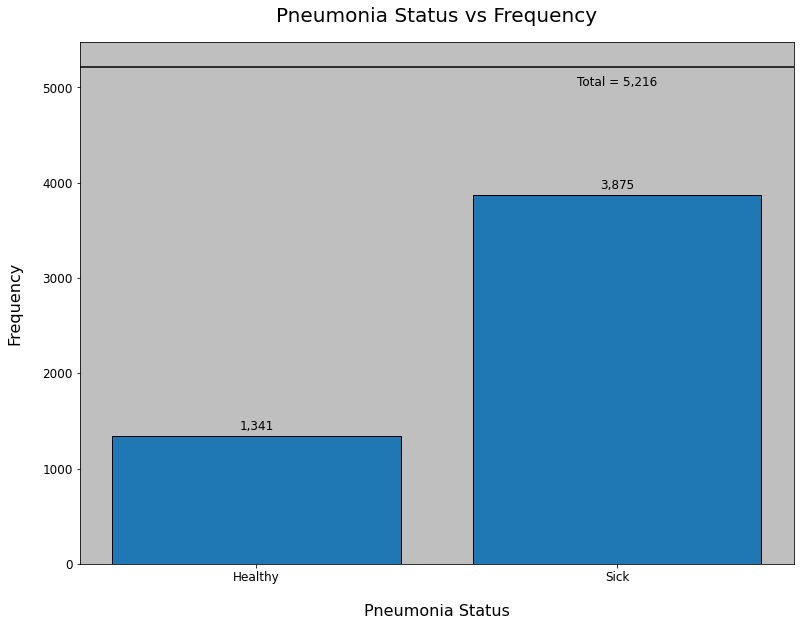

In [13]:
fig, ax = plt.subplots(figsize=(12.8, 9.6))

ax.bar(pd.DataFrame(train_labels64)[1].value_counts().index,
       pd.DataFrame(train_labels64)[1].value_counts(),
       edgecolor='black')
ax.set_xlabel('Pneumonia Status',
              labelpad=20,
              fontsize=16)
ax.set_ylabel('Frequency',
              labelpad=20,
              fontsize=16)
ax.set_title('Pneumonia Status vs Frequency',
             pad=20,
             fontsize=20)
ax.set_xticks((0, 1))
ax.set_xticklabels(['Healthy',
                    'Sick'],)
ax.tick_params(axis='both',
               which='major',
               labelsize=12)
ax.set_facecolor('0.75')
plt.axhline(y=5216,
            color='black')
plt.text(x=1, y=3875+64, s='3,875', fontsize=12, ha='center')
plt.text(x=0, y=1341+64, s='1,341', fontsize=12, ha='center')
plt.text(x=1, y=5216-196, s='Total = 5,216', fontsize=12, ha='center')

;

Based on the above visualization, it is clear to see that we have many more images of pneumatic lungs in our training set than we do of healthy lungs. However, the class may not be so imbalanced that the distribution is an issue. The sick images constitute approximately 74% percent of our training set, leaving the healthy images with a share of 26%. This distribution will not prove to be an issue in our final model.

Let's now take a look at the dimensionality of our images.

In [14]:
train_images64.shape

(5216, 64, 64, 3)

In [15]:
train_images128.shape

(5216, 128, 128, 3)

In [16]:
train_images256.shape

(5216, 256, 256, 3)

For any given size of image, we can see that the arrays have the following dimensions:

* First, the number of images in that array.
* Second, the number of rows in an image in that array.
* Third, the number of columns in an image in that array.
* Finally, the depth of an image in that array.

Since these images are x-rays, we know them to be black and white, so we can reduce the dimensionality of the images by slicing just the first of these layers of depth while retaining the fidelity of the images.

In [17]:
train_images64 = train_images64[ : , : , : , 0]
display(train_images64.shape)
train_images64 = train_images64.reshape(5216, 64, 64, 1)
display(train_images64.shape)
test_images64 = test_images64[ : , : , : , 0]
display(test_images64.shape)
test_images64 = test_images64.reshape(624, 64, 64, 1)
display(test_images64.shape)
val_images64 = val_images64[ : , : , : , 0]
display(val_images64.shape)
val_images64 = val_images64.reshape(16, 64, 64, 1)
display(val_images64.shape)

(5216, 64, 64)

(5216, 64, 64, 1)

(624, 64, 64)

(624, 64, 64, 1)

(16, 64, 64)

(16, 64, 64, 1)

In [18]:
train_images128 = train_images128[ : , : , : , 0]
display(train_images128.shape)
train_images128 = train_images128.reshape(5216, 128, 128, 1)
display(train_images128.shape)
test_images128 = test_images128[ : , : , : , 0]
display(test_images128.shape)
test_images128 = test_images128.reshape(624, 128, 128, 1)
display(test_images128.shape)
val_images128 = val_images128[ : , : , : , 0]
display(val_images128.shape)
val_images128 = val_images128.reshape(16, 128, 128, 1)
display(val_images128.shape)

(5216, 128, 128)

(5216, 128, 128, 1)

(624, 128, 128)

(624, 128, 128, 1)

(16, 128, 128)

(16, 128, 128, 1)

In [19]:
train_images256 = train_images256[ : , : , : , 0]
display(train_images256.shape)
train_images256 = train_images256.reshape(5216, 256, 256, 1)
display(train_images256.shape)
test_images256 = test_images256[ : , : , : , 0]
display(test_images256.shape)
test_images256 = test_images256.reshape(624, 256, 256, 1)
display(test_images256.shape)
val_images256 = val_images256[ : , : , : , 0]
display(val_images256.shape)
val_images256 = val_images256.reshape(16, 256, 256, 1)
display(val_images256.shape)

(5216, 256, 256)

(5216, 256, 256, 1)

(624, 256, 256)

(624, 256, 256, 1)

(16, 256, 256)

(16, 256, 256, 1)

Below is a series of image previews at various resolutions,<br>as well as several sniff tests to make sure our dimensionality has been reduced for all image resolutions.

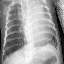

In [20]:
# Preview an image
np.random.seed(42)
img64 = array_to_img(train_images64[np.random.randint(1, 5216)])
img64

In [21]:
np.random.seed(42)
train_images64[np.random.randint(1, 5216)].shape

(64, 64, 1)

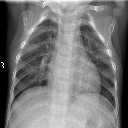

In [22]:
# Preview an image
np.random.seed(42)
img128 = array_to_img(train_images128[np.random.randint(1, 5216)])
img128

In [23]:
np.random.seed(42)
train_images128[np.random.randint(1, 5216)].shape

(128, 128, 1)

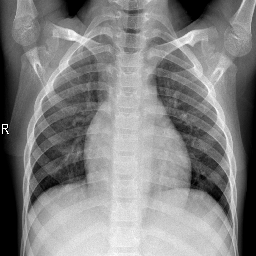

In [24]:
# Preview an image
np.random.seed(42)
img256 = array_to_img(train_images256[np.random.randint(1, 5216)])
img256

In [25]:
np.random.seed(42)
train_images256[np.random.randint(1, 5216)].shape

(256, 256, 1)

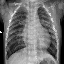

In [26]:
# Preview another image
np.random.seed(69)
img64 = array_to_img(train_images64[np.random.randint(1, 5216)])
img64

In [27]:
np.random.seed(69)
train_images64[np.random.randint(1, 5216)].shape

(64, 64, 1)

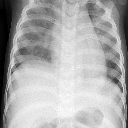

In [28]:
# Preview another image
np.random.seed(69)
img128 = array_to_img(train_images128[np.random.randint(1, 5216)])
img128

In [29]:
np.random.seed(69)
train_images128[np.random.randint(1, 5216)].shape

(128, 128, 1)

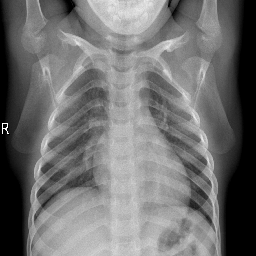

In [30]:
# Preview another image
np.random.seed(69)
img256 = array_to_img(train_images256[np.random.randint(1, 5216)])
img256

In [31]:
np.random.seed(69)
train_images256[np.random.randint(1, 5216)].shape

(256, 256, 1)

The following cells were used to observe additional random samples of the datasets.<br>
They have been commented out to reduce the size of the notebook.

In [32]:
# np.random.seed(42)
# for i in range(0,10):
#     display(array_to_img(train_images64[i]))

In [33]:
# np.random.seed(42)
# for i in range(0,10):
#     display(array_to_img(train_images128[i]))

In [34]:
# np.random.seed(42)
# for i in range(0,10):
#     display(array_to_img(train_images256[i]))

Now let's create some new variables which are the reshaped versions of each image into single vectors.<br>These are the variables that we will use for our densely connected neural networks.

In [35]:
train_img64 = train_images64.reshape(train_images64.shape[0], -1)
test_img64 = test_images64.reshape(test_images64.shape[0], -1)
val_img64 = val_images64.reshape(val_images64.shape[0], -1)

print(train_img64.shape)
print(test_img64.shape)
print(val_img64.shape)

(5216, 4096)
(624, 4096)
(16, 4096)


In [36]:
train_img128 = train_images128.reshape(train_images128.shape[0], -1)
test_img128 = test_images128.reshape(test_images128.shape[0], -1)
val_img128 = val_images128.reshape(val_images128.shape[0], -1)

print(train_img128.shape)
print(test_img128.shape)
print(val_img128.shape)

(5216, 16384)
(624, 16384)
(16, 16384)


In [37]:
train_img256 = train_images256.reshape(train_images256.shape[0], -1)
test_img256 = test_images256.reshape(test_images256.shape[0], -1)
val_img256 = val_images256.reshape(val_images256.shape[0], -1)

print(train_img256.shape)
print(test_img256.shape)
print(val_img256.shape)

(5216, 65536)
(624, 65536)
(16, 65536)


In the following cell, we create a new variable which is all of the vectorized images into a single array.<br>This is the first step in splitting the data properly, as mentioned above. More to follow.

In [38]:
all_img64 = np.concatenate((train_img64, test_img64, val_img64), axis=0)

Just as we reshaped our images, we will also be reshaping our labels.<br>Originally, they were one-hot-encoded into two columns, so we'll just make them one here.

In [39]:
train_y64 = np.reshape(train_labels64[:,0], (5216,1))
test_y64 = np.reshape(test_labels64[:,0], (624,1))
val_y64 = np.reshape(val_labels64[:,0], (16,1))

In [40]:
train_y128 = np.reshape(train_labels128[:,0], (5216,1))
test_y128 = np.reshape(test_labels128[:,0], (624,1))
val_y128 = np.reshape(val_labels128[:,0], (16,1))

In [41]:
train_y256 = np.reshape(train_labels256[:,0], (5216,1))
test_y256 = np.reshape(test_labels256[:,0], (624,1))
val_y256 = np.reshape(val_labels256[:,0], (16,1))

Again, we have created a new variable which is all of the labels concatenated, in order, for use in a much more effective split.

In [42]:
all_y64 = np.concatenate((train_y64, test_y64, val_y64), axis=0)

And this is where the magic happens that really turned up the performance of this project.

Here, we perform a train test split of our total images array and total labels array, creating a training images array and a temporary images array, as well as a training labels array and a temporary labels array, with a specified random state and a default split of 75/25. Once split, we again split our temporary images array and temporary labels array into validation images and test images, as well as validation labels and test labels.

In [43]:
new_train_img64, temp_img64, new_train_y64, temp_y64 = train_test_split(all_img64, all_y64, random_state=42)
new_val_img64, new_test_img64, new_val_y64, new_test_y64 = train_test_split(temp_img64, temp_y64, random_state=42)

In [44]:
for array in (new_train_img64, new_val_img64, new_test_img64, new_train_y64, new_val_y64, new_test_y64):
    display(array.shape)

(4392, 4096)

(1098, 4096)

(366, 4096)

(4392, 1)

(1098, 1)

(366, 1)

What comes out the other side is a much more useful split of training, validation, and test data, as will become evident in our final model's performance.

It is worth noting at this time that the above resplit was only conducted on the 64x64 images, as the resulting model accuracy was high enough for our purposes, given the resources we had to work on this project. Even better model performance could likely be achieved by performing a similar resplit of higher resolution images.

## Data Modeling
A description and justification of the process for modeling the data.

***

Questions to consider:
* How did you analyze or model the data?
    * We modeled the data using densely connected neural networks and convolutional neural networks.
* How did you iterate on your initial approach to make it better?
    * We tuned various hyperparameters, including the learning rate, the strength of regularization, and the type of optimizer.
    * Perhaps most importantly, we properly split the data.
* Why are these choices appropriate given the data and the business problem?
    * Neural networks, particularly convolutional neural networks, are particularly well-suited to image classification.

***

In the following cells, we create six models:
* First, a four-layer model with 64x64 images.
* Second, a four-layer model with 128x128 images.
* Third, a four-layer model with 256x256 images.
* Fourth, a two-layer model with 64x64 images.
* Fifth, a two-layer model with 128x128 images.
* Sixth, a two-layer model with 256x256 images.

In [45]:
# Build a baseline fully connected 64x64 model
np.random.seed(42)
model64 = models.Sequential()
model64.add(layers.Dense(64, activation='relu', input_shape=(4096,))) # 2 hidden layers
model64.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2()))
model64.add(layers.Dense(2, activation='relu', kernel_regularizer=regularizers.l2()))
model64.add(layers.Dense(1, activation='sigmoid'))

In [46]:
# Build a baseline fully connected 128x128 model
np.random.seed(42)
model128 = models.Sequential()
model128.add(layers.Dense(128, activation='relu', input_shape=(16384,))) # 2 hidden layers
model128.add(layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2()))
model128.add(layers.Dense(3, activation='relu', kernel_regularizer=regularizers.l2()))
model128.add(layers.Dense(1, activation='sigmoid'))

In [47]:
# Build a baseline fully connected 256x256 model
np.random.seed(42)
model256 = models.Sequential()
model256.add(layers.Dense(256, activation='relu', input_shape=(65536,))) # 2 hidden layers
model256.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2()))
model256.add(layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2()))
model256.add(layers.Dense(1, activation='sigmoid'))

In [48]:
# Build a shallow fully connected 64x64 model
np.random.seed(42)
model64shal = models.Sequential()
model64shal.add(layers.Dense(64, activation='relu', input_shape=(4096,)))
model64shal.add(layers.Dense(1, activation='sigmoid'))

In [49]:
# Build a shallow fully connected 128x128 model
np.random.seed(42)
model128shal = models.Sequential()
model128shal.add(layers.Dense(128, activation='relu', input_shape=(16384,)))
model128shal.add(layers.Dense(1, activation='sigmoid'))

In [50]:
# Build a shallow fully connected 256x256 model
np.random.seed(42)
model256shal = models.Sequential()
model256shal.add(layers.Dense(256, activation='relu', input_shape=(65536,)))
model256shal.add(layers.Dense(1, activation='sigmoid'))

Now that we have some model variables created, let's create a custom optimizer with a slightly slower learning rate. Ideally, this would have helped us deal with the overfitting we were seeing in the modeling process but, ultimately, the small size of the validation set trumped any modifications to the hyperparameters of these models. Nevertheless, they were part of the project and have been retained for project version history.

In [51]:
sgd_lr_001 = keras.optimizers.SGD(learning_rate=1e-3, decay=1e-3/64)

Below are the cells which compile, fit, and evaluate all of the above models.

In [52]:
model64.compile(optimizer=sgd_lr_001,
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire64 = model64.fit(train_img64,
                    train_y64,
                    epochs=64,
                    batch_size=32,
                    validation_data=(val_img64, val_y64),
                    verbose=1)

Epoch 1/64
163/163 [==============================] - 1s 4ms/step - loss: 0.7051 - accuracy: 0.7406 - val_loss: 0.8961 - val_accuracy: 0.5000
Epoch 2/64
163/163 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7429 - val_loss: 0.8546 - val_accuracy: 0.5000
Epoch 3/64
163/163 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7429 - val_loss: 0.8671 - val_accuracy: 0.5000
Epoch 4/64
163/163 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7429 - val_loss: 0.8353 - val_accuracy: 0.5000
Epoch 5/64
163/163 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7429 - val_loss: 0.8492 - val_accuracy: 0.5000
Epoch 6/64
163/163 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7826 - val_loss: 0.8649 - val_accuracy: 0.5625
Epoch 7/64
163/163 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.8229 - val_loss: 0.8611 - val_accuracy: 0.6250
Epoch 

In [53]:
model128.compile(optimizer=sgd_lr_001,
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire128 = model128.fit(train_img128,
                    train_y128,
                    epochs=64,
                    batch_size=32,
                    validation_data=(val_img128, val_y128),
                    verbose=1)

Epoch 1/64
163/163 [==============================] - 2s 11ms/step - loss: 0.9392 - accuracy: 0.7429 - val_loss: 0.9427 - val_accuracy: 0.5000
Epoch 2/64
163/163 [==============================] - 1s 8ms/step - loss: 0.9301 - accuracy: 0.7429 - val_loss: 0.9417 - val_accuracy: 0.5000
Epoch 3/64
163/163 [==============================] - 1s 8ms/step - loss: 0.9216 - accuracy: 0.7429 - val_loss: 0.9409 - val_accuracy: 0.5000
Epoch 4/64
163/163 [==============================] - 1s 8ms/step - loss: 0.9135 - accuracy: 0.7429 - val_loss: 0.9404 - val_accuracy: 0.5000
Epoch 5/64
163/163 [==============================] - 1s 8ms/step - loss: 0.9060 - accuracy: 0.7429 - val_loss: 0.9400 - val_accuracy: 0.5000
Epoch 6/64
163/163 [==============================] - 1s 8ms/step - loss: 0.8988 - accuracy: 0.7429 - val_loss: 0.9399 - val_accuracy: 0.5000
Epoch 7/64
163/163 [==============================] - 1s 8ms/step - loss: 0.8921 - accuracy: 0.7429 - val_loss: 0.9398 - val_accuracy: 0.5000
Epoch

163/163 [==============================] - 1s 8ms/step - loss: 0.7595 - accuracy: 0.7429 - val_loss: 0.9659 - val_accuracy: 0.5000
Epoch 59/64
163/163 [==============================] - 1s 8ms/step - loss: 0.7584 - accuracy: 0.7429 - val_loss: 0.9660 - val_accuracy: 0.5000
Epoch 60/64
163/163 [==============================] - 1s 7ms/step - loss: 0.7573 - accuracy: 0.7429 - val_loss: 0.9661 - val_accuracy: 0.5000
Epoch 61/64
163/163 [==============================] - 1s 7ms/step - loss: 0.7562 - accuracy: 0.7429 - val_loss: 0.9662 - val_accuracy: 0.5000
Epoch 62/64
163/163 [==============================] - 1s 8ms/step - loss: 0.7551 - accuracy: 0.7429 - val_loss: 0.9663 - val_accuracy: 0.5000
Epoch 63/64
163/163 [==============================] - 1s 8ms/step - loss: 0.7540 - accuracy: 0.7429 - val_loss: 0.9663 - val_accuracy: 0.5000
Epoch 64/64
163/163 [==============================] - 1s 7ms/step - loss: 0.7530 - accuracy: 0.7429 - val_loss: 0.9664 - val_accuracy: 0.5000


In [54]:
model256.compile(optimizer=sgd_lr_001,
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire256 = model256.fit(train_img256,
                    train_y256,
                    epochs=64,
                    batch_size=32,
                    validation_data=(val_img256, val_y256),
                    verbose=1)

Epoch 1/64
163/163 [==============================] - 8s 49ms/step - loss: 0.8316 - accuracy: 0.7473 - val_loss: 1.1127 - val_accuracy: 0.5000
Epoch 2/64
163/163 [==============================] - 7s 44ms/step - loss: 0.7141 - accuracy: 0.8200 - val_loss: 1.2676 - val_accuracy: 0.5000
Epoch 3/64
163/163 [==============================] - 7s 44ms/step - loss: 0.6732 - accuracy: 0.8668 - val_loss: 0.9461 - val_accuracy: 0.5625
Epoch 4/64
163/163 [==============================] - 7s 44ms/step - loss: 0.6546 - accuracy: 0.8911 - val_loss: 1.0576 - val_accuracy: 0.5625
Epoch 5/64
163/163 [==============================] - 7s 43ms/step - loss: 0.6408 - accuracy: 0.9038 - val_loss: 1.0039 - val_accuracy: 0.6875
Epoch 6/64
163/163 [==============================] - 7s 44ms/step - loss: 0.6313 - accuracy: 0.9151 - val_loss: 1.0135 - val_accuracy: 0.5625
Epoch 7/64
163/163 [==============================] - 7s 44ms/step - loss: 0.6199 - accuracy: 0.9201 - val_loss: 1.0565 - val_accuracy: 0.6250

In [55]:
model64shal.compile(optimizer=sgd_lr_001,
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire64shal = model64shal.fit(train_img64,
                    train_y64,
                    epochs=64,
                    batch_size=32,
                    validation_data=(val_img64, val_y64),
                    verbose=1)

Epoch 1/64
163/163 [==============================] - 2s 11ms/step - loss: 0.5627 - accuracy: 0.7301 - val_loss: 0.7641 - val_accuracy: 0.5000
Epoch 2/64
163/163 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7433 - val_loss: 0.7414 - val_accuracy: 0.5000
Epoch 3/64
163/163 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7488 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 4/64
163/163 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.7692 - val_loss: 0.6748 - val_accuracy: 0.5625
Epoch 5/64
163/163 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8056 - val_loss: 0.6332 - val_accuracy: 0.6250
Epoch 6/64
163/163 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8378 - val_loss: 0.6351 - val_accuracy: 0.6250
Epoch 7/64
163/163 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8589 - val_loss: 0.6084 - val_accuracy: 0.6875
Epoch

163/163 [==============================] - 1s 4ms/step - loss: 0.1481 - accuracy: 0.9488 - val_loss: 0.3811 - val_accuracy: 0.8750
Epoch 59/64
163/163 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9488 - val_loss: 0.3805 - val_accuracy: 0.8750
Epoch 60/64
163/163 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9479 - val_loss: 0.4015 - val_accuracy: 0.8125
Epoch 61/64
163/163 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9479 - val_loss: 0.3955 - val_accuracy: 0.8125
Epoch 62/64
163/163 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.9486 - val_loss: 0.3681 - val_accuracy: 0.8750
Epoch 63/64
163/163 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9486 - val_loss: 0.3718 - val_accuracy: 0.8750
Epoch 64/64
163/163 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.9494 - val_loss: 0.4083 - val_accuracy: 0.8125


In [56]:
model128shal.compile(optimizer=sgd_lr_001,
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire128shal = model128shal.fit(train_img128,
                    train_y128,
                    epochs=64,
                    batch_size=32,
                    validation_data=(val_img128, val_y128),
                    verbose=1)

Epoch 1/64
163/163 [==============================] - 2s 9ms/step - loss: 0.4815 - accuracy: 0.7577 - val_loss: 0.6593 - val_accuracy: 0.6250
Epoch 2/64
163/163 [==============================] - 1s 8ms/step - loss: 0.3685 - accuracy: 0.8482 - val_loss: 0.6329 - val_accuracy: 0.6250
Epoch 3/64
163/163 [==============================] - 1s 8ms/step - loss: 0.3098 - accuracy: 0.8928 - val_loss: 0.6005 - val_accuracy: 0.6875
Epoch 4/64
163/163 [==============================] - 1s 8ms/step - loss: 0.2762 - accuracy: 0.9084 - val_loss: 0.5711 - val_accuracy: 0.6875
Epoch 5/64
163/163 [==============================] - 1s 8ms/step - loss: 0.2532 - accuracy: 0.9137 - val_loss: 0.4860 - val_accuracy: 0.8125
Epoch 6/64
163/163 [==============================] - 1s 8ms/step - loss: 0.2356 - accuracy: 0.9189 - val_loss: 0.5272 - val_accuracy: 0.6875
Epoch 7/64
163/163 [==============================] - 1s 8ms/step - loss: 0.2219 - accuracy: 0.9247 - val_loss: 0.5771 - val_accuracy: 0.6875
Epoch 

In [57]:
model256shal.compile(optimizer=sgd_lr_001,
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire256shal = model256shal.fit(train_img256,
                    train_y256,
                    epochs=64,
                    batch_size=32,
                    validation_data=(val_img256, val_y256),
                    verbose=1)

Epoch 1/64
163/163 [==============================] - 9s 55ms/step - loss: 0.4098 - accuracy: 0.8167 - val_loss: 0.6387 - val_accuracy: 0.6875
Epoch 2/64
163/163 [==============================] - 7s 44ms/step - loss: 0.2598 - accuracy: 0.9022 - val_loss: 0.4275 - val_accuracy: 0.8750
Epoch 3/64
163/163 [==============================] - 7s 44ms/step - loss: 0.2137 - accuracy: 0.9237 - val_loss: 0.3805 - val_accuracy: 0.8125
Epoch 4/64
163/163 [==============================] - 7s 44ms/step - loss: 0.1935 - accuracy: 0.9337 - val_loss: 0.4571 - val_accuracy: 0.8125
Epoch 5/64
163/163 [==============================] - 7s 44ms/step - loss: 0.1748 - accuracy: 0.9373 - val_loss: 0.3726 - val_accuracy: 0.8750
Epoch 6/64
163/163 [==============================] - 7s 44ms/step - loss: 0.1641 - accuracy: 0.9411 - val_loss: 0.3858 - val_accuracy: 0.8125
Epoch 7/64
163/163 [==============================] - 7s 44ms/step - loss: 0.1570 - accuracy: 0.9425 - val_loss: 0.3546 - val_accuracy: 0.8750

Epoch 58/64
163/163 [==============================] - 7s 44ms/step - loss: 0.0882 - accuracy: 0.9688 - val_loss: 0.3012 - val_accuracy: 0.8750
Epoch 59/64
163/163 [==============================] - 7s 44ms/step - loss: 0.0877 - accuracy: 0.9699 - val_loss: 0.3679 - val_accuracy: 0.8125
Epoch 60/64
163/163 [==============================] - 7s 44ms/step - loss: 0.0876 - accuracy: 0.9695 - val_loss: 0.2849 - val_accuracy: 0.8750
Epoch 61/64
163/163 [==============================] - 7s 44ms/step - loss: 0.0856 - accuracy: 0.9686 - val_loss: 0.3304 - val_accuracy: 0.8125
Epoch 62/64
163/163 [==============================] - 7s 43ms/step - loss: 0.0873 - accuracy: 0.9684 - val_loss: 0.3133 - val_accuracy: 0.8750
Epoch 63/64
163/163 [==============================] - 7s 43ms/step - loss: 0.0868 - accuracy: 0.9688 - val_loss: 0.2823 - val_accuracy: 0.8750
Epoch 64/64
163/163 [==============================] - 7s 44ms/step - loss: 0.0859 - accuracy: 0.9716 - val_loss: 0.2406 - val_accuracy:

In [58]:
results_train64 = model64.evaluate(train_img64, train_y64)

163/163 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.9615


In [59]:
results_train64shal = model64shal.evaluate(train_img64, train_y64)

163/163 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9473


In [60]:
results_train128 = model128.evaluate(train_img128, train_y128)

163/163 [==============================] - 0s 3ms/step - loss: 0.7524 - accuracy: 0.7429


In [61]:
results_train128shal = model128shal.evaluate(train_img128, train_y128)

163/163 [==============================] - 1s 3ms/step - loss: 0.1106 - accuracy: 0.9603


In [62]:
results_train256 = model256.evaluate(train_img256, train_y256)

163/163 [==============================] - 3s 16ms/step - loss: 0.4529 - accuracy: 0.9670


In [63]:
results_train256shal = model256shal.evaluate(train_img256, train_y256)

163/163 [==============================] - 3s 18ms/step - loss: 0.0858 - accuracy: 0.9707


In [64]:
results_test64 = model64.evaluate(test_img64, test_y64)

20/20 [==============================] - 0s 1ms/step - loss: 0.7986 - accuracy: 0.7628


In [65]:
results_test64shal = model64shal.evaluate(test_img64, test_y64)

20/20 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.7516


In [66]:
results_test128 = model128.evaluate(test_img128, test_y128)

20/20 [==============================] - 0s 9ms/step - loss: 0.8563 - accuracy: 0.6250


In [67]:
results_test128shal = model128shal.evaluate(test_img128, test_y128)

20/20 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.7612


In [68]:
results_test256 = model256.evaluate(test_img256, test_y256)

20/20 [==============================] - 0s 13ms/step - loss: 0.9570 - accuracy: 0.7740


In [69]:
results_test256shal = model256shal.evaluate(test_img256, test_y256)

20/20 [==============================] - 0s 15ms/step - loss: 0.6944 - accuracy: 0.7676


In [70]:
results_train64

[0.23755846917629242, 0.9614647030830383]

In [71]:
results_train64shal

[0.14298541843891144, 0.9472776055335999]

In [72]:
results_train128

[0.7524358034133911, 0.7429064512252808]

In [73]:
results_train128shal

[0.11064650863409042, 0.9603143930435181]

In [74]:
results_train256

[0.4529328942298889, 0.967024564743042]

In [75]:
results_train256shal

[0.08575691282749176, 0.9706671833992004]

In [76]:
results_test64

[0.7986125946044922, 0.7628205418586731]

In [77]:
results_test64shal

[0.5732387900352478, 0.7516025900840759]

In [78]:
results_test128

[0.8562877178192139, 0.625]

In [79]:
results_test128shal

[0.6368591785430908, 0.7612179517745972]

In [80]:
results_test256

[0.9569737315177917, 0.7740384340286255]

In [81]:
results_test256shal

[0.6943886280059814, 0.7676281929016113]

Based on the results of these evaluations, we can see that the training accuracies for the models were all roughly 97% and the test accuracies for the models were roughly 75%. Given the distribution of the target class, this is very poor performance from modeling. These accuracies are no better than simply guessing that every image is of a pneumatic patient.

Let's see if a convolutional neural network will do a better job of predicting the target than a densely connected neural network.

We will, again, create some variables for the models, compile them, fit them, and evaluate them.<br>
Note that the 256x256 convolutional neural networks have been commented out due to execution time and lack of appreciable gains in performance.

In [82]:
cnn64 = models.Sequential()
cnn64.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 1), kernel_regularizer=regularizers.l2()))
cnn64.add(layers.MaxPooling2D((2, 2)))

cnn64.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer=regularizers.l2()))
cnn64.add(layers.MaxPooling2D((2, 2)))

cnn64.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2()))
cnn64.add(layers.MaxPooling2D((2, 2)))

cnn64.add(layers.Flatten())
cnn64.add(layers.Dense(64, activation='relu'))
cnn64.add(layers.Dense(1, activation='sigmoid'))

cnn64.compile(loss='binary_crossentropy',
              optimizer=sgd_lr_001,
              metrics=['acc'])

In [83]:
cnn128 = models.Sequential()
cnn128.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1), kernel_regularizer=regularizers.l2()))
cnn128.add(layers.MaxPooling2D((2, 2)))

cnn128.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer=regularizers.l2()))
cnn128.add(layers.MaxPooling2D((2, 2)))

cnn128.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2()))
cnn128.add(layers.MaxPooling2D((2, 2)))

cnn128.add(layers.Flatten())
cnn128.add(layers.Dense(64, activation='relu'))
cnn128.add(layers.Dense(1, activation='sigmoid'))

cnn128.compile(loss='binary_crossentropy',
              optimizer=sgd_lr_001,
              metrics=['acc'])

In [84]:
# cnn256 = models.Sequential()
# cnn256.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(256, 256, 1), kernel_regularizer=regularizers.l2()))
# cnn256.add(layers.MaxPooling2D((2, 2)))

# cnn256.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer=regularizers.l2()))
# cnn256.add(layers.MaxPooling2D((2, 2)))

# cnn256.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2()))
# cnn256.add(layers.MaxPooling2D((2, 2)))

# cnn256.add(layers.Flatten())
# cnn256.add(layers.Dense(64, activation='relu'))
# cnn256.add(layers.Dense(1, activation='sigmoid'))

# cnn256.compile(loss='binary_crossentropy',
#               optimizer=sgd_lr_001,
#               metrics=['acc'])

In [85]:
history64 = cnn64.fit(train_images64,
                    train_y64,
                    epochs=64,
                    batch_size=32,
                    validation_data=(val_images64, val_y64),
                    verbose=1)

Epoch 1/64
163/163 [==============================] - 12s 75ms/step - loss: 1.4580 - acc: 0.5048 - val_loss: 1.4561 - val_acc: 0.5000
Epoch 2/64
163/163 [==============================] - 11s 71ms/step - loss: 1.4315 - acc: 0.7429 - val_loss: 1.4564 - val_acc: 0.5000
Epoch 3/64
163/163 [==============================] - 11s 69ms/step - loss: 1.4086 - acc: 0.7429 - val_loss: 1.4601 - val_acc: 0.5000
Epoch 4/64
163/163 [==============================] - 11s 69ms/step - loss: 1.3875 - acc: 0.7429 - val_loss: 1.4678 - val_acc: 0.5000
Epoch 5/64
163/163 [==============================] - 11s 69ms/step - loss: 1.3667 - acc: 0.7429 - val_loss: 1.4815 - val_acc: 0.5000
Epoch 6/64
163/163 [==============================] - 11s 70ms/step - loss: 1.3483 - acc: 0.7429 - val_loss: 1.5005 - val_acc: 0.5000
Epoch 7/64
163/163 [==============================] - 11s 68ms/step - loss: 1.3345 - acc: 0.7429 - val_loss: 1.5208 - val_acc: 0.5000
Epoch 8/64
163/163 [==============================] - 11s 69ms

Epoch 62/64
163/163 [==============================] - 11s 70ms/step - loss: 1.1252 - acc: 0.7429 - val_loss: 1.3977 - val_acc: 0.5000
Epoch 63/64
163/163 [==============================] - 11s 70ms/step - loss: 1.1179 - acc: 0.7429 - val_loss: 1.3929 - val_acc: 0.5000
Epoch 64/64
163/163 [==============================] - 11s 70ms/step - loss: 1.1089 - acc: 0.7441 - val_loss: 1.4003 - val_acc: 0.5000


In [86]:
history128 = cnn128.fit(train_images128,
                    train_y128,
                    epochs=64,
                    batch_size=32,
                    validation_data=(val_images128, val_y128),
                    verbose=1)

Epoch 1/64
163/163 [==============================] - 47s 291ms/step - loss: 1.4517 - acc: 0.6120 - val_loss: 1.4602 - val_acc: 0.5000
Epoch 2/64
163/163 [==============================] - 47s 288ms/step - loss: 1.4171 - acc: 0.7429 - val_loss: 1.4668 - val_acc: 0.5000
Epoch 3/64
163/163 [==============================] - 47s 289ms/step - loss: 1.3837 - acc: 0.7429 - val_loss: 1.4869 - val_acc: 0.5000
Epoch 4/64
163/163 [==============================] - 47s 288ms/step - loss: 1.3547 - acc: 0.7429 - val_loss: 1.5194 - val_acc: 0.5000
Epoch 5/64
163/163 [==============================] - 47s 286ms/step - loss: 1.3381 - acc: 0.7429 - val_loss: 1.5501 - val_acc: 0.5000
Epoch 6/64
163/163 [==============================] - 47s 289ms/step - loss: 1.3309 - acc: 0.7429 - val_loss: 1.5681 - val_acc: 0.5000
Epoch 7/64
163/163 [==============================] - 46s 284ms/step - loss: 1.3269 - acc: 0.7429 - val_loss: 1.5749 - val_acc: 0.5000
Epoch 8/64
163/163 [==============================] - 4

In [87]:
# history256 = cnn256.fit(train_images256,
#                     train_y256,
#                     epochs=64,
#                     batch_size=32,
#                     validation_data=(val_images256, val_y256))

In [88]:
results_train_cnn64 = cnn64.evaluate(train_images64, train_y64)

163/163 [==============================] - 2s 13ms/step - loss: 1.1048 - acc: 0.7441


In [89]:
results_train_cnn128 = cnn128.evaluate(train_images128, train_y128)

163/163 [==============================] - 7s 46ms/step - loss: 0.8257 - acc: 0.9289


In [90]:
# results_train_cnn256 = cnn256.evaluate(train_images256, train_y256)

In [91]:
results_test_cnn64 = cnn64.evaluate(test_images64, test_y64)

20/20 [==============================] - 0s 12ms/step - loss: 1.2198 - acc: 0.6250


In [92]:
results_test_cnn128 = cnn128.evaluate(test_images128, test_y128)

20/20 [==============================] - 1s 41ms/step - loss: 1.2061 - acc: 0.7660


In [93]:
# results_test_cnn256 = cnn256.evaluate(test_images256, test_y256)

Compared to the results of the densely connected neural networks, these models perform similarly or worse.<br>
These models could likely have been improved with a proper split of the data, which is done on the final model below.

In the cell below, we created a class that would allow us to create models quickly and with various input dimensions, in order to ascertain the true benefit of using images of various resolutions. Additionally, the 'reg' parameter allowed for a change of the type and strength of regularization of the model, if any.

This "Strided Net" code was originally sourced from the following URL:<br>
https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/<br>
It has since been modified to suit our purposes.

In [94]:
class StridedNet:
    @staticmethod
    def build(width, height, depth, classes, reg, init="he_normal"):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
        # our first CONV layer will learn a total of 16 filters, each
        # Of which are 7x7 -- we'll then apply 2x2 strides to reduce
        # the spatial dimensions of the volume
        model.add(Conv2D(16, (7, 7), strides=(2, 2), padding="valid",
            kernel_initializer=init, kernel_regularizer=reg,
            input_shape=inputShape))
        # here we stack two CONV layers on top of each other where
        # each layerswill learn a total of 32 (3x3) filters
        model.add(Conv2D(32, (3, 3), padding="same",
            kernel_initializer=init, kernel_regularizer=reg))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(32, (3, 3), strides=(2, 2), padding="same",
            kernel_initializer=init, kernel_regularizer=reg))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Dropout(0.25))
        # stack two more CONV layers, keeping the size of each filter
        # as 3x3 but increasing to 64 total learned filters
        model.add(Conv2D(64, (3, 3), padding="same",
            kernel_initializer=init, kernel_regularizer=reg))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same",
            kernel_initializer=init, kernel_regularizer=reg))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Dropout(0.25))
        # increase the number of filters again, this time to 128
        model.add(Conv2D(128, (3, 3), padding="same",
            kernel_initializer=init, kernel_regularizer=reg))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same",
            kernel_initializer=init, kernel_regularizer=reg))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Dropout(0.25))
        # fully-connected layer
        model.add(Flatten())
        model.add(Dense(512, kernel_initializer=init))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        # sigmoid classifier
        model.add(Dense(classes))
        model.add(Activation("sigmoid"))
        # return the constructed network architecture
        return model

Below, we create several strided networks, thus named because they use a stride of 2 rather than pooling, and then compile them, fit them, and evaluate them. For the same reasons that the above models struggled to perform well, these models also did not do exceptionally well and an in-depth analysis of their performance will similarly not be covered.

In [95]:
strided_network = StridedNet()

In [96]:
str_64 = strided_network.build(width=64, height=64, depth=1, classes=1, reg=regularizers.l2(0.0005))

In [97]:
opt = keras.optimizers.SGD(learning_rate=1e-4, decay=1e-4/50)
str_64.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [98]:
str_64_history = str_64.fit(train_images64,
                          train_y64,
                          epochs=64,
                          batch_size=32,
                          validation_data=(val_images64,
                                           val_y64),
                          verbose=1)

Epoch 1/64
163/163 [==============================] - 13s 77ms/step - loss: 1.4479 - accuracy: 0.5349 - val_loss: 1.2191 - val_accuracy: 0.5625
Epoch 2/64
163/163 [==============================] - 11s 69ms/step - loss: 1.3956 - accuracy: 0.5679 - val_loss: 1.2353 - val_accuracy: 0.6250
Epoch 3/64
163/163 [==============================] - 11s 69ms/step - loss: 1.3610 - accuracy: 0.5832 - val_loss: 1.1623 - val_accuracy: 0.5625
Epoch 4/64
163/163 [==============================] - 11s 69ms/step - loss: 1.3285 - accuracy: 0.5957 - val_loss: 1.0461 - val_accuracy: 0.5625
Epoch 5/64
163/163 [==============================] - 11s 70ms/step - loss: 1.3048 - accuracy: 0.6189 - val_loss: 1.0605 - val_accuracy: 0.5625
Epoch 6/64
163/163 [==============================] - 11s 69ms/step - loss: 1.2647 - accuracy: 0.6321 - val_loss: 1.0647 - val_accuracy: 0.5625
Epoch 7/64
163/163 [==============================] - 11s 69ms/step - loss: 1.2686 - accuracy: 0.6338 - val_loss: 1.0204 - val_accuracy:

In [99]:
str_results_train64 = str_64.evaluate(train_images64, train_y64)

163/163 [==============================] - 2s 14ms/step - loss: 0.6133 - accuracy: 0.9461


In [100]:
str_results_val64 = str_64.evaluate(val_images64, val_y64)

1/1 [==============================] - 0s 0s/step - loss: 0.8942 - accuracy: 0.8125


In [101]:
str_results_test64 = str_64.evaluate(test_images64, test_y64)

20/20 [==============================] - 0s 13ms/step - loss: 0.8941 - accuracy: 0.8077


In [102]:
str_128 = strided_network.build(width=128, height=128, depth=1, classes=1, reg=regularizers.l2(0.0005))

In [103]:
opt = keras.optimizers.SGD(learning_rate=1e-4, decay=1e-4/50)
str_128.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [104]:
str_128_history = str_128.fit(train_images128,
                          train_y128,
                          epochs=64,
                          batch_size=32,
                          validation_data=(val_images128,
                                           val_y128),
                          verbose=1)

Epoch 1/64
163/163 [==============================] - 42s 258ms/step - loss: 1.4950 - accuracy: 0.5073 - val_loss: 1.1407 - val_accuracy: 0.5000
Epoch 2/64
163/163 [==============================] - 42s 258ms/step - loss: 1.3342 - accuracy: 0.5857 - val_loss: 1.1350 - val_accuracy: 0.5000
Epoch 3/64
163/163 [==============================] - 42s 255ms/step - loss: 1.2472 - accuracy: 0.6288 - val_loss: 1.1771 - val_accuracy: 0.5000
Epoch 4/64
163/163 [==============================] - 43s 263ms/step - loss: 1.1933 - accuracy: 0.6564 - val_loss: 1.0242 - val_accuracy: 0.6250
Epoch 5/64
163/163 [==============================] - 44s 271ms/step - loss: 1.1826 - accuracy: 0.6794 - val_loss: 0.9628 - val_accuracy: 0.8125
Epoch 6/64
163/163 [==============================] - 42s 259ms/step - loss: 1.1568 - accuracy: 0.6931 - val_loss: 0.9734 - val_accuracy: 0.6875
Epoch 7/64
163/163 [==============================] - 42s 257ms/step - loss: 1.1333 - accuracy: 0.6982 - val_loss: 1.0476 - val_ac

In [105]:
str_results_train128 = str_128.evaluate(train_images128, train_y128)

163/163 [==============================] - 6s 36ms/step - loss: 0.5875 - accuracy: 0.9620


In [106]:
str_results_val128 = str_128.evaluate(val_images128, val_y128)

1/1 [==============================] - 0s 0s/step - loss: 0.8255 - accuracy: 0.8125


In [107]:
str_results_test128 = str_128.evaluate(test_images128, test_y128)

20/20 [==============================] - 1s 32ms/step - loss: 1.1116 - accuracy: 0.7468


In [108]:
# str_256 = strided_network.build(width=256, height=256, depth=1, classes=1, reg=regularizers.l2(0.0005))

In [109]:
# opt = keras.optimizers.SGD(learning_rate=1e-4, decay=1e-4/50)
# str_256.compile(loss='binary_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

In [110]:
# str_256_history = str_256.fit(train_images256,
#                           train_y256,
#                           epochs=64,
#                           batch_size=32,
#                           validation_data=(val_images256,
#                                            val_y256))

In [111]:
# str_results_train256 = str_256.evaluate(train_images256, train_y256)

In [112]:
# str_results_val256 = str_256.evaluate(val_images256, val_y256)

In [113]:
# str_results_test256 = str_256.evaluate(test_images256, test_y256)

In [114]:
# str_final = strided_network.build(width=256, height=256, depth=1, classes=1, reg=regularizers.l2(0.0005))
# opt = keras.optimizers.SGD(learning_rate=1e-4, decay=1e-4/50)
# str_final.compile(loss='binary_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])
# str_final_history = str_final.fit(train_images256,
#                           train_y256,
#                           epochs=128,
#                           batch_size=16,
#                           validation_data=(val_images256,
#                                            val_y256))
# str_results_train_final = str_final.evaluate(train_images256, train_y256)
# display(str_results_train_final)
# str_results_val_final = str_final.evaluate(val_images256, val_y256)
# display(str_results_val_final)
# str_results_test_final = str_final.evaluate(test_images256, test_y256)
# display(str_results_test_final)

Epoch 1/10
163/163 [==============================] - 10s 62ms/step - loss: 1.9958 - accuracy: 0.8378 - val_loss: 1.2046 - val_accuracy: 0.5625
Epoch 2/10
163/163 [==============================] - 10s 62ms/step - loss: 0.2817 - accuracy: 0.9266 - val_loss: 0.5969 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 10s 61ms/step - loss: 0.2339 - accuracy: 0.9383 - val_loss: 1.0200 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 10s 61ms/step - loss: 0.2121 - accuracy: 0.9427 - val_loss: 0.6384 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 10s 61ms/step - loss: 0.2093 - accuracy: 0.9423 - val_loss: 1.0635 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 10s 61ms/step - loss: 0.2017 - accuracy: 0.9480 - val_loss: 0.6586 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 10s 61ms/step - loss: 0.1931 - accuracy: 0.9490 - val_loss: 0.6635 - val_accuracy:

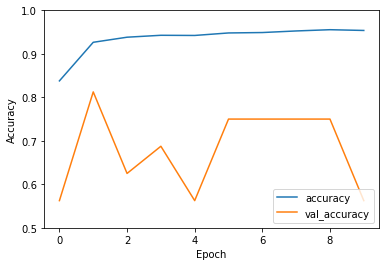

In [115]:
simple_cnn64 = models.Sequential()
simple_cnn64.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1), kernel_regularizer=regularizers.l2(0.1)))
simple_cnn64.add(layers.MaxPooling2D((2, 2)))
simple_cnn64.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
simple_cnn64.add(layers.MaxPooling2D((2, 2)))
simple_cnn64.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
simple_cnn64.add(layers.Flatten())
simple_cnn64.add(layers.Dense(64, activation='relu'))
simple_cnn64.add(layers.Dense(1, activation='sigmoid'))
simple_cnn64.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_cnn64 = simple_cnn64.fit(train_images64, train_y64, epochs=10, 
                    validation_data=(val_images64, val_y64))
plt.plot(history_cnn64.history['accuracy'], label='accuracy')
plt.plot(history_cnn64.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = simple_cnn64.evaluate(test_images64,  test_y64, verbose=1)

In [116]:
simple_cnn64.evaluate(test_images64,  test_y64, verbose=2)[1]

20/20 - 0s - loss: 1.0627 - accuracy: 0.7115


0.7115384340286255

The below graph was generated during the best run of one of the above models, which was, at the time, our best-performing model.<br>Based on random states, even its performance varies wildly through successive iterations of the notebook.

20/20 - 0s - loss: 1.0627 - accuracy: 0.7115
20/20 - 0s - loss: 1.0627 - accuracy: 0.7115


''

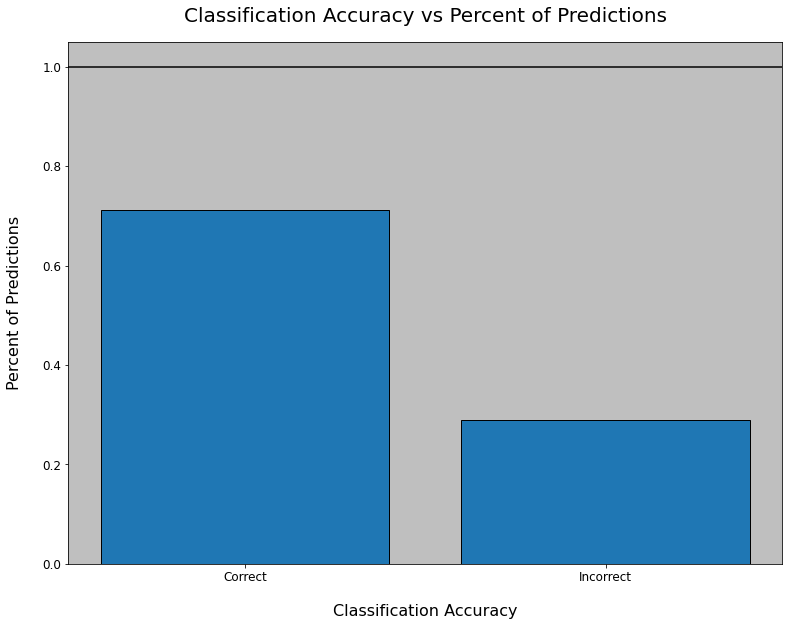

In [117]:
fig, ax = plt.subplots(figsize=(12.8, 9.6))

ax.bar(('Correct', 'Incorrect'),
       (simple_cnn64.evaluate(test_images64,  test_y64, verbose=2)[1],
        1 - simple_cnn64.evaluate(test_images64,  test_y64, verbose=2)[1]),
       edgecolor='black')
ax.set_xlabel('Classification Accuracy',
              labelpad=20,
              fontsize=16)
ax.set_ylabel('Percent of Predictions',
              labelpad=20,
              fontsize=16)
ax.set_title('Classification Accuracy vs Percent of Predictions',
             pad=20,
             fontsize=20)
ax.set_xticks((0, 1))
ax.set_xticklabels(['Correct',
                    'Incorrect'],)
ax.tick_params(axis='both',
               which='major',
               labelsize=12)
ax.set_facecolor('0.75')
plt.axhline(y=1,
            color='black')
# plt.text(x=0, y=.85, s='80%', fontsize=12, ha='center')
# plt.text(x=1, y=.25, s='20%', fontsize=12, ha='center')
# plt.text(x=.5, y=.95, s='Total = 100%', fontsize=12, ha='center')

;

Epoch 1/10
163/163 [==============================] - 10s 63ms/step - loss: 0.5230 - accuracy: 0.7805 - val_loss: 0.6303 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 10s 63ms/step - loss: 0.2819 - accuracy: 0.9026 - val_loss: 0.4633 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 10s 62ms/step - loss: 0.2103 - accuracy: 0.9339 - val_loss: 0.9683 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 10s 63ms/step - loss: 0.1769 - accuracy: 0.9469 - val_loss: 0.5909 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 10s 62ms/step - loss: 0.1592 - accuracy: 0.9538 - val_loss: 1.1654 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 10s 63ms/step - loss: 0.1482 - accuracy: 0.9557 - val_loss: 0.5201 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 10s 63ms/step - loss: 0.1406 - accuracy: 0.9599 - val_loss: 0.2832 - val_accuracy:

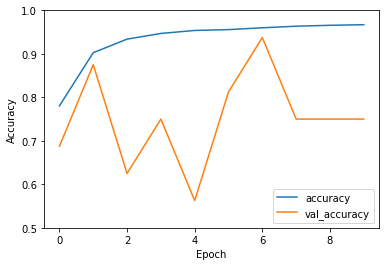

In [118]:
opt = keras.optimizers.Adam(learning_rate=1e-4, decay=1e-4/50)
simple_cnn64_two = models.Sequential()
simple_cnn64_two.add(layers.Conv2D(32,
                                   (3, 3),
                                   activation='relu',
                                   input_shape=(64, 64, 1),
                                   kernel_regularizer=regularizers.l2(0.0005)))
simple_cnn64_two.add(layers.MaxPooling2D((2, 2)))
simple_cnn64_two.add(layers.Conv2D(64,
                                   (3, 3),
                                   activation='relu',
                                   kernel_regularizer=regularizers.l2(0.0005)))
simple_cnn64_two.add(layers.MaxPooling2D((2, 2)))
simple_cnn64_two.add(layers.Conv2D(64,
                                   (3, 3),
                                   activation='relu',
                                   kernel_regularizer=regularizers.l2(0.0005)))
simple_cnn64_two.add(layers.Flatten())
simple_cnn64_two.add(layers.Dense(64,
                                  activation='relu'))
simple_cnn64_two.add(layers.Dense(1,
                                  activation='sigmoid'))
simple_cnn64_two.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_cnn64_two = simple_cnn64_two.fit(train_images64,
                                         train_y64,
                                         epochs=10, 
                    validation_data=(val_images64,
                                     val_y64))
plt.plot(history_cnn64_two.history['accuracy'],
         label='accuracy')
plt.plot(history_cnn64_two.history['val_accuracy'],
         label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = simple_cnn64_two.evaluate(test_images64,
                                                test_y64,
                                                verbose=1)

In [119]:
np.random.seed(42)
test = models.Sequential()
test.add(layers.Dense(2048, activation='relu', input_shape=(4096,))) # 2 hidden layers
test.add(layers.Dense(1, activation='sigmoid'))
test.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
test_hist = test.fit(train_img64,
                    train_y64,
                    epochs=10,
                    validation_data=(val_img64, val_y64),
                    verbose=1)

Epoch 1/10
163/163 [==============================] - 6s 35ms/step - loss: 0.5391 - accuracy: 0.8528 - val_loss: 0.6289 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 6s 35ms/step - loss: 0.1805 - accuracy: 0.9287 - val_loss: 0.2808 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 6s 35ms/step - loss: 0.1724 - accuracy: 0.9327 - val_loss: 0.4541 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 6s 35ms/step - loss: 0.1553 - accuracy: 0.9371 - val_loss: 0.4395 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 6s 35ms/step - loss: 0.1355 - accuracy: 0.9480 - val_loss: 0.2000 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 6s 35ms/step - loss: 0.1353 - accuracy: 0.9479 - val_loss: 0.2777 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 6s 35ms/step - loss: 0.1407 - accuracy: 0.9467 - val_loss: 0.2992 - val_accuracy: 0.9375

In [120]:
test.evaluate(test_img64, test_y64)

20/20 [==============================] - 0s 6ms/step - loss: 0.9023 - accuracy: 0.7340


[0.9022988677024841, 0.7339743375778198]

In [121]:
np.random.seed(42)
test2 = models.Sequential()
test2.add(layers.Dense(2048, activation='relu', input_shape=(4096,))) # 2 hidden layers
test2.add(layers.Dense(1, activation='sigmoid'))
test2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
test2_hist = test2.fit(train_img64,
                    train_y64,
                    epochs=100,
                    validation_data=(val_img64, val_y64),
                    verbose=1)

Epoch 1/100
163/163 [==============================] - 6s 35ms/step - loss: 0.3652 - accuracy: 0.8923 - val_loss: 0.3180 - val_accuracy: 0.8750
Epoch 2/100
163/163 [==============================] - 6s 35ms/step - loss: 0.2128 - accuracy: 0.9189 - val_loss: 0.3187 - val_accuracy: 0.9375
Epoch 3/100
163/163 [==============================] - 6s 35ms/step - loss: 0.1499 - accuracy: 0.9425 - val_loss: 0.2467 - val_accuracy: 0.9375
Epoch 4/100
163/163 [==============================] - 6s 35ms/step - loss: 0.1408 - accuracy: 0.9465 - val_loss: 0.3088 - val_accuracy: 0.9375
Epoch 5/100
163/163 [==============================] - 6s 35ms/step - loss: 0.1237 - accuracy: 0.9532 - val_loss: 0.2866 - val_accuracy: 0.9375
Epoch 6/100
163/163 [==============================] - 6s 35ms/step - loss: 0.1228 - accuracy: 0.9548 - val_loss: 0.2491 - val_accuracy: 0.9375
Epoch 7/100
163/163 [==============================] - 6s 35ms/step - loss: 0.1422 - accuracy: 0.9480 - val_loss: 0.5059 - val_accuracy:

In [122]:
test2.evaluate(test_img64, test_y64)

20/20 [==============================] - 0s 6ms/step - loss: 2.2050 - accuracy: 0.7372


[2.2049717903137207, 0.7371794581413269]

The following cell is the first step in the execution of the modeling process with a proper train/test/val split. Here, we create a densely connected neural network with a single hidden layer half the size of the input layer and default hyperparameters all around, with the exception of the number of epochs the model trains on.

In [123]:
np.random.seed(42)
new_split_model = models.Sequential()
new_split_model.add(layers.Dense(2048, activation='relu', input_shape=(4096,))) # 2 hidden layers
new_split_model.add(layers.Dense(1, activation='sigmoid'))
new_split_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
new_split_model_hist = new_split_model.fit(new_train_img64,
                    new_train_y64,
                    epochs=10,
                    validation_data=(new_val_img64, new_val_y64),
                    verbose=1)
new_split_model.evaluate(new_test_img64, new_test_y64)

Epoch 1/10
138/138 [==============================] - 5s 38ms/step - loss: 0.7369 - accuracy: 0.8242 - val_loss: 0.3085 - val_accuracy: 0.8761
Epoch 2/10
138/138 [==============================] - 5s 37ms/step - loss: 0.2223 - accuracy: 0.9089 - val_loss: 0.2664 - val_accuracy: 0.8834
Epoch 3/10
138/138 [==============================] - 5s 36ms/step - loss: 0.2088 - accuracy: 0.9183 - val_loss: 0.2005 - val_accuracy: 0.9171
Epoch 4/10
138/138 [==============================] - 5s 37ms/step - loss: 0.1856 - accuracy: 0.9249 - val_loss: 0.1554 - val_accuracy: 0.9381
Epoch 5/10
138/138 [==============================] - 5s 36ms/step - loss: 0.1946 - accuracy: 0.9267 - val_loss: 0.1563 - val_accuracy: 0.9399
Epoch 6/10
138/138 [==============================] - 5s 37ms/step - loss: 0.2278 - accuracy: 0.9105 - val_loss: 0.4217 - val_accuracy: 0.8224
Epoch 7/10
138/138 [==============================] - 5s 37ms/step - loss: 0.1849 - accuracy: 0.9278 - val_loss: 0.1500 - val_accuracy: 0.9426

[0.19669316709041595, 0.9207650423049927]

After this very simple model with a proper split, it is plain to see that a proper split resulted in significantly increased model performance.

The following few cells reshape the single-dimensional data into two-dimensional data for use in a convolutional neural network below.

In [124]:
train_img64.shape

(5216, 4096)

In [125]:
train_y64.shape

(5216, 1)

In [126]:
new_train_img64.shape

(4392, 4096)

In [127]:
new_train_y64.shape

(4392, 1)

In [128]:
train_images64.shape

(5216, 64, 64, 1)

In [129]:
new_train_images64 = np.reshape(new_train_img64, (4392, 64, 64, 1))

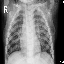

In [130]:
array_to_img(new_train_images64[0].reshape(64, 64, 1))

In [131]:
new_val_images64 = np.reshape(new_val_img64, (1098, 64, 64, 1))

In [132]:
new_test_images64 = np.reshape(new_test_img64, (366, 64, 64, 1))

This network uses the strided network class created above and produces results even better than the simple densely connected network we just made.

In [133]:
str_new = strided_network.build(width=64, height=64, depth=1, classes=1, reg=regularizers.l2(0.0005))
opt = keras.optimizers.Adam(learning_rate=1e-4, decay=1e-4/50)
str_new.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
str_new_history = str_new.fit(new_train_images64,
                          new_train_y64,
                          epochs=128,
                          batch_size=16,
                          validation_data=(new_val_images64,
                                           new_val_y64),
                          verbose=1)
str_new_results_train = str_new.evaluate(new_train_images64, new_train_y64)
display(str_new_results_train)
str_new_results_val = str_new.evaluate(new_val_images64, new_val_y64)
display(str_new_results_val)
str_new_results_test = str_new.evaluate(new_test_images64, new_test_y64)
display(str_new_results_test)

Epoch 1/128
275/275 [==============================] - 13s 46ms/step - loss: 1.1078 - accuracy: 0.7245 - val_loss: 0.8764 - val_accuracy: 0.7723
Epoch 2/128
275/275 [==============================] - 12s 44ms/step - loss: 0.8842 - accuracy: 0.8327 - val_loss: 0.7066 - val_accuracy: 0.8953
Epoch 3/128
275/275 [==============================] - 12s 44ms/step - loss: 0.8307 - accuracy: 0.8618 - val_loss: 0.6268 - val_accuracy: 0.9344
Epoch 4/128
275/275 [==============================] - 12s 44ms/step - loss: 0.7869 - accuracy: 0.8796 - val_loss: 0.6751 - val_accuracy: 0.9062
Epoch 5/128
275/275 [==============================] - 12s 44ms/step - loss: 0.7324 - accuracy: 0.8948 - val_loss: 0.6059 - val_accuracy: 0.9472
Epoch 6/128
275/275 [==============================] - 12s 44ms/step - loss: 0.7119 - accuracy: 0.9053 - val_loss: 0.6036 - val_accuracy: 0.9508
Epoch 7/128
275/275 [==============================] - 12s 44ms/step - loss: 0.6835 - accuracy: 0.9178 - val_loss: 0.6914 - val_ac

275/275 [==============================] - 12s 44ms/step - loss: 0.2875 - accuracy: 0.9941 - val_loss: 0.4207 - val_accuracy: 0.9627
Epoch 114/128
275/275 [==============================] - 12s 44ms/step - loss: 0.2844 - accuracy: 0.9929 - val_loss: 0.4207 - val_accuracy: 0.9617
Epoch 115/128
275/275 [==============================] - 12s 44ms/step - loss: 0.2897 - accuracy: 0.9927 - val_loss: 0.4799 - val_accuracy: 0.9508
Epoch 116/128
275/275 [==============================] - 12s 44ms/step - loss: 0.2808 - accuracy: 0.9936 - val_loss: 0.4309 - val_accuracy: 0.9608
Epoch 117/128
275/275 [==============================] - 12s 44ms/step - loss: 0.2828 - accuracy: 0.9923 - val_loss: 0.4408 - val_accuracy: 0.9554
Epoch 118/128
275/275 [==============================] - 12s 44ms/step - loss: 0.2768 - accuracy: 0.9945 - val_loss: 0.4234 - val_accuracy: 0.9590
Epoch 119/128
275/275 [==============================] - 12s 44ms/step - loss: 0.2778 - accuracy: 0.9932 - val_loss: 0.4447 - val_ac

[0.24416591227054596, 1.0]

35/35 [==============================] - 0s 13ms/step - loss: 0.3911 - accuracy: 0.9617


[0.3910839557647705, 0.9617486596107483]

12/12 [==============================] - 0s 13ms/step - loss: 0.4326 - accuracy: 0.9508


[0.4325976073741913, 0.9508196711540222]

In [134]:
str_new_results_train = str_new.evaluate(new_train_images64, new_train_y64)
display(str_new_results_train)
str_new_results_val = str_new.evaluate(new_val_images64, new_val_y64)
display(str_new_results_val)
str_new_results_test = str_new.evaluate(new_test_images64, new_test_y64)
display(str_new_results_test)

138/138 [==============================] - 2s 13ms/step - loss: 0.2442 - accuracy: 1.0000


[0.24416591227054596, 1.0]

35/35 [==============================] - 0s 13ms/step - loss: 0.3911 - accuracy: 0.9617


[0.3910839557647705, 0.9617486596107483]

12/12 [==============================] - 0s 13ms/step - loss: 0.4326 - accuracy: 0.9508


[0.4325976073741913, 0.9508196711540222]

12/12 - 0s - loss: 0.4326 - accuracy: 0.9508
12/12 - 0s - loss: 0.4326 - accuracy: 0.9508
12/12 - 0s - loss: 0.4326 - accuracy: 0.9508
12/12 - 0s - loss: 0.4326 - accuracy: 0.9508


''

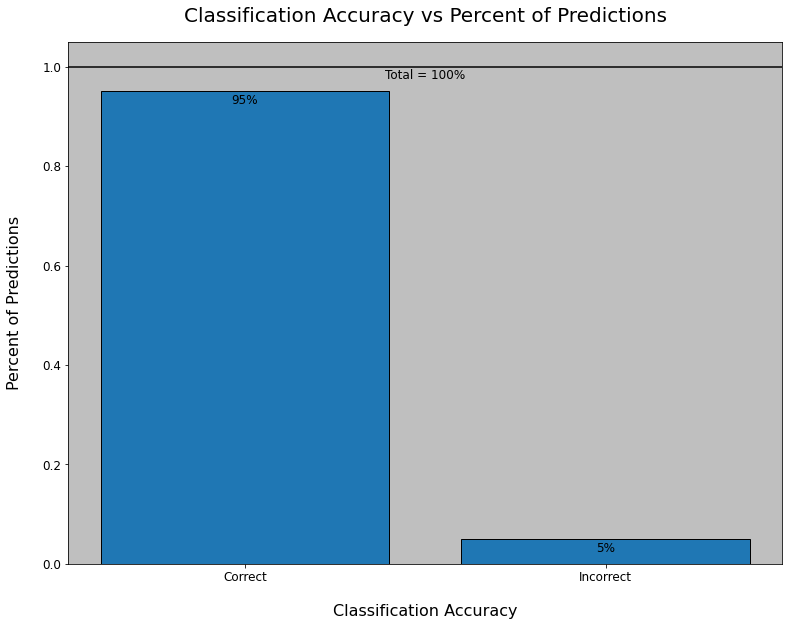

In [135]:
fig, ax = plt.subplots(figsize=(12.8, 9.6))

ax.bar(('Correct', 'Incorrect'),
       (str_new.evaluate(new_test_images64,  new_test_y64, verbose=2)[1],
        1 - str_new.evaluate(new_test_images64,  new_test_y64, verbose=2)[1]),
       edgecolor='black')
ax.set_xlabel('Classification Accuracy',
              labelpad=20,
              fontsize=16)
ax.set_ylabel('Percent of Predictions',
              labelpad=20,
              fontsize=16)
ax.set_title('Classification Accuracy vs Percent of Predictions',
             pad=20,
             fontsize=20)
ax.set_xticks((0, 1))
ax.set_xticklabels(['Correct',
                    'Incorrect'],)
ax.tick_params(axis='both',
               which='major',
               labelsize=12)
ax.set_facecolor('0.75')
plt.axhline(y=1,
            color='black')
plt.text(x=0,
         y=(str_new.evaluate(new_test_images64, new_test_y64, verbose=2)[1]) - 0.025,
         s='95%',
         fontsize=12,
         ha='center')
plt.text(x=1,
         y=(1 - (str_new.evaluate(new_test_images64, new_test_y64, verbose=2)[1])) - 0.025,
         s='5%',
         fontsize=12,
         ha='center')
plt.text(x=.5,
         y=.975,
         s='Total = 100%',
         fontsize=12,
         ha='center')

;

Achieving an accuracy of 95% on unseen data, we feel satisfied that this model performs well enough for our purposes and are proud of our results.

## Evaluation
An evaluation of how well our work solves the organization's stated problems.

***

Questions to consider:
* How do you interpret the results?
    * Based on the accuracy score of our final model, we can say that the model, called PneuNet in presentation,<br>
    can accurately classify a patient as being healthy or having pneumonia 95% of the time.
* How well does your model fit your data? How much better is this than your baseline model?
    * The model fits the data quite well. It is significantly better than the baseline model.
* How confident are you that your results would generalize beyond the data you have?
    * We are quite confident that our results would generalize beyond the data that we have.
    * It is, however, important to note that the images the network was trained on were already thoroughly quality controlled,<br>so new images would likely have to be of a similar level of image pre-processing to be usable by the network.
* How confident are you that this model would benefit the organization if put into use?
    * We are very confident that this model would benefit the communities it serves if put into use.
    * If this model was deployed in areas with limited medical expertise,<br>it could dramatically reduce the time it takes to accurately identify children with pneumonia.

***

## Conclusions
A provision of our conclusions about the work we've done, including any limitations or next steps.

***

Questions to consider:
* What would you recommend the business do as a result of this work?
    * We recommend the organization deploy the model using chest x-rays of children,<br>
    in order to determine whether they have pneumonia.
* What are some reasons why your analysis might not fully solve the business problem?
    * Despite its accuracy, PneuNet is not perfect. It will incorrectly classify children 5% of the time,<br>
    which is still a high number of children in the context of hundreds of thousands of patients.
* What else could you do in the future to improve this project?
    * In the future, we would like to deploy more robust models with a proper train/test/validation split.

***